In [1]:
from nsepython import nsefetch
import pandas as pd

# Define stock and segment
symbol = "RELIANCE"
series = "EQ"   # Equity

# NSE historical data API (deliverable data)
url = f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22{series}%22]&from=01-01-2024&to=01-03-2024"

# Fetch data
data = nsefetch(url)

# Convert to DataFrame
df = pd.DataFrame(data['data'])

# Select useful columns
df = df[['CH_TIMESTAMP','CH_OPENING_PRICE','CH_TRADE_HIGH_PRICE','CH_TRADE_LOW_PRICE','CH_CLOSING_PRICE','CH_TOT_TRADED_QTY']]

# Rename columns
df.columns = ['Date','Open','High','Low','Close','Volume']

print(df.head())

# Save to CSV
#df.to_csv("Reliance_Historical.csv", index=False)

         Date     Open     High      Low    Close    Volume
0  2024-03-01  2927.00  3000.00  2925.00  2984.25   6066463
1  2024-02-29  2930.00  2957.95  2909.05  2921.60  11814488
2  2024-02-28  2966.00  2982.55  2900.35  2911.25   4323975
3  2024-02-27  2966.05  2999.90  2956.10  2971.30   5413022
4  2024-02-26  2987.10  2989.05  2965.00  2974.65   3756553


Variance-Covariance Matrix:
          Asset1    Asset2    Asset3
Asset1  0.000062  0.000068  0.000072
Asset2  0.000068  0.000077  0.000083
Asset3  0.000072  0.000083  0.000092

Eigenvalues (sorted):
Principal Component 1: 0.000227
Principal Component 2: 0.000003
Principal Component 3: 0.000000

Eigenvectors (sorted by eigenvalues):
PC1 weights: [-0.51352937 -0.58157469 -0.63091875]
PC2 weights: [-7.75429548e-01 -3.05578698e-04  6.31434020e-01]
PC3 weights: [ 0.36741884 -0.81349295  0.45081327]


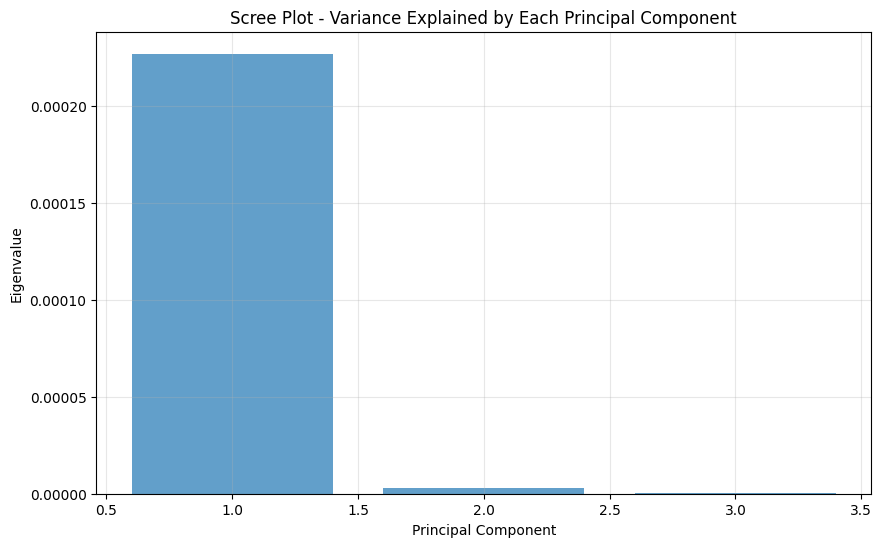

In [3]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq

df1 = pd.read_parquet("/Users/vanshaj/Work/GitHub/Quant_Labs/Application/Data/Assets Data/INDICES/INDIA/NIFTY 50_history.parquet")
df2 = pd.read_parquet("/Users/vanshaj/Work/GitHub/Quant_Labs/Application/Data/Assets Data/INDICES/INDIA/NIFTY 100_history.parquet")
df3 = pd.read_parquet("/Users/vanshaj/Work/GitHub/Quant_Labs/Application/Data/Assets Data/INDICES/INDIA/NIFTY 200_history.parquet")

import matplotlib.pyplot as plt

# Complete analysis function
def analyze_assets(df1, df2, df3):
    # Calculate returns
    returns1 = calculate_returns(df1)
    returns2 = calculate_returns(df2)
    returns3 = calculate_returns(df3)
    
    # Combine returns
    returns_df = pd.DataFrame({
        'Asset1': returns1,
        'Asset2': returns2,
        'Asset3': returns3
    })
    
    # Calculate covariance matrix
    cov_matrix = returns_df.cov()
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix.values)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    return returns_df, cov_matrix, eigenvalues, eigenvectors

# Run the analysis
returns_df, cov_matrix, eigenvalues, eigenvectors = analyze_assets(df1, df2, df3)

# Print results
print("Variance-Covariance Matrix:")
print(cov_matrix)

print("\nEigenvalues (sorted):")
for i, val in enumerate(eigenvalues):
    print(f"Principal Component {i+1}: {val:.6f}")

print("\nEigenvectors (sorted by eigenvalues):")
for i, vec in enumerate(eigenvectors.T):
    print(f"PC{i+1} weights: {vec}")

# Optional: Plot eigenvalues (scree plot)
plt.figure(figsize=(10, 6))
plt.bar(range(1, 4), eigenvalues, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot - Variance Explained by Each Principal Component')
plt.grid(True, alpha=0.3)
plt.show()


In [4]:
# Calculate proportion of variance explained
total_variance = np.sum(eigenvalues)
variance_explained = eigenvalues / total_variance

print("\nVariance Explained by Each Principal Component:")
for i, var in enumerate(variance_explained):
    print(f"PC{i+1}: {var*100:.2f}%")

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(variance_explained)
print(f"\nCumulative Variance: {cumulative_variance}")

# Calculate correlation matrix (optional)
corr_matrix = returns_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Variance Explained by Each Principal Component:
PC1: 98.56%
PC2: 1.39%
PC3: 0.06%

Cumulative Variance: [0.98558417 0.99944946 1.        ]

Correlation Matrix:
          Asset1    Asset2    Asset3
Asset1  1.000000  0.983125  0.956706
Asset2  0.983125  1.000000  0.991785
Asset3  0.956706  0.991785  1.000000
